# GRAFICO DE EQUILIBRIO DE FASES: "BENZENO + 1-BUTANOL" ECUACION DE MARGULES

## Descripción General
Este proyecto calcula y grafica el equilibrio de fases del sistema binario Benzeno + 1-Butanol utilizando la ecuación de Margules para modelar los coeficientes de actividad. Se utilizan las ecuaciones de Antoine para calcular la presión de vapor de los componentes a diferentes fracciones molares y temperaturas.


## Importación de Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definición de Datos Experimentales y Constantes

### Datos Experimentales
Estos valores fueron obtenidos del Dortmund Data Bank (DDB).

In [2]:
x1_ex = np.array([0,0.004,0.040,0.085,0.134,0.161,0.180,0.234,0.308,0.369,0.397,0.475,0.560,0.631,0.714,0.790,0.848,0.897,0.928,0.942,0.948,0.954,1])
y1_ex = np.array([0,0.025,0.217,0.386,0.510,0.565,0.595,0.672,0.735,0.782,0.785,0.822,0.844,0.855,0.870,0.892,0.910,0.934,0.947,0.954,0.957,0.961,1])
Te_ex = np.array([117.70,116.90,112.00,107.10,102.22,100.22,98.70,95.60,92.25,89.69,88.28,86.39,84.54,83.19,81.98,81.36,80.87,80.67,80.39,80.28,80.26,80.16,80.09])

### Constantes de los Componentes
Estas constantes fueron obtenidas del libro: Tomados del artículo científico "Prediction of Ternary Vapor-Liquid Equilibria from Binary Data".

In [3]:
N_Butanol = {"Pc":44.2,"Tc":563.1,"Te":117.7,"A":8.27488,"B":1872.9,"C":230}
Benzeno = {"Pc":48.9,"Tc":353.3,"Te":80.1,"A":6.90565,"B":1211.033,"C":220.790}

## Funciones y Cálculos

### Función de Antoine
Esta función calcula la presión de vapor de un componente en función de la temperatura utilizando la ecuación de Antoine. La temperatura (T) debe ingresarse en grados Celsius (°C), y la presión de vapor resultante se obtiene en milímetros de mercurio (mmHg).

In [4]:
def Antonie(T, A, B, C):
    log = A - B / (T + C)
    anto = 10**log
    return anto

### Parámetros Iniciales y Cálculo de Equilibrio

In [5]:
# Asignación de componentes y generación de fracciones molares.
Comp1 = Benzeno
Comp2 = N_Butanol
x1 = np.linspace(0, 1, 1000)
x2 = 1 - x1

# Parámetros de interacción binaria para el modelo de Margules:
Da_Mar = {"A21": 0.5651, "A12": 0.3449}
Pc = 760

# Cálculo de la temperatura de equilibrio
Te_te = np.zeros(len(x1))
Te = Comp1["Te"]
for j in range(len(x1)):
    x11 = x1[j]
    x21 = 1 - x11
    for i in range(10000):
        Pvp_1 = Antonie(Te, Comp1["A"], Comp1["B"], Comp1["C"])
        Pvp_2 = Antonie(Te, Comp2["A"], Comp2["B"], Comp2["C"])
        gama1 = 10**((x21**2) * (Da_Mar["A12"] + 2 * x11 * (Da_Mar["A21"] - Da_Mar["A12"])))
        gama2 = 10**((x11**2) * (Da_Mar["A21"] + 2 * x21 * (Da_Mar["A12"] - Da_Mar["A21"])))
        y1 = gama1 * Pvp_1 * x11 / Pc
        y2 = gama2 * Pvp_2 * x21 / Pc
        a = y1 + y2
        b = abs(1 - a)
        if b <= 0.001:
            Te_te[j] = Te
            break
        Te += 0.05
    Te = Comp1["Te"]

### Cálculo de Pvp y Coeficientes de Actividad

In [6]:
Pvp_1 = Antonie(Te_te, Comp1["A"], Comp1["B"], Comp1["C"])
Pvp_2 = Antonie(Te_te, Comp2["A"], Comp2["B"], Comp2["C"])
gama1 = 10**((x2**2) * (Da_Mar["A12"] + 2 * x1 * (Da_Mar["A21"] - Da_Mar["A12"])))
gama2 = 10**((x1**2) * (Da_Mar["A21"] + 2 * x2 * (Da_Mar["A12"] - Da_Mar["A21"])))
y1 = gama1 * Pvp_1 * x1 / Pc
y2 = gama2 * Pvp_2 * x2 / Pc

## Visualización de Resultados

### Gráfico 1: Fracción Molar vs $y_1$

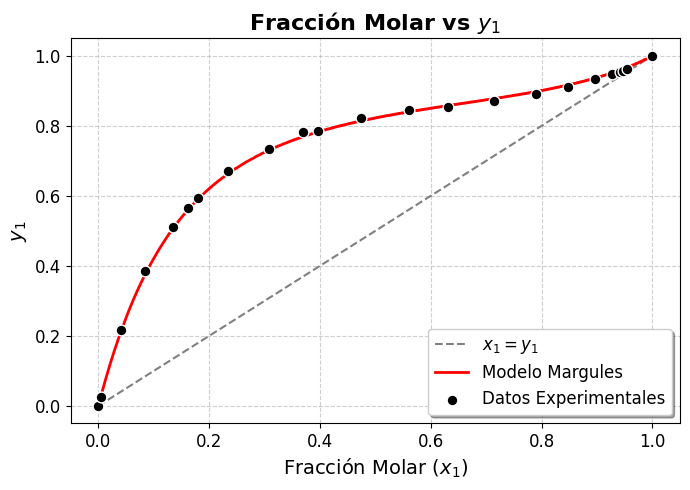

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(x1, x1, color='grey', linestyle='--', linewidth=1.5, label='$x_1 = y_1$')
plt.plot(x1, y1, color='red', linestyle='-', linewidth=2, label='Modelo Margules')
plt.scatter(x1_ex, y1_ex, color='black', edgecolors='white', s=60, zorder=5, label='Datos Experimentales')
plt.title("Fracción Molar vs $y_1$", fontsize=16, fontweight='bold')
plt.xlabel("Fracción Molar ($x_1$)", fontsize=14)
plt.ylabel("$y_1$", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, loc='best', shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Gráfico 2: Fracción Molar vs Temperatura

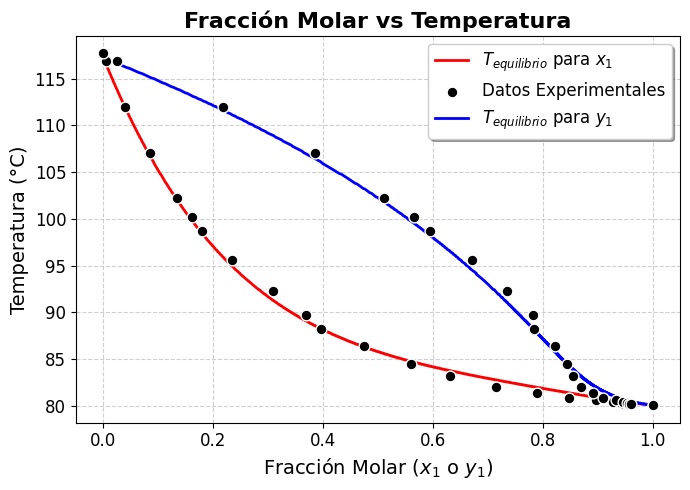

In [8]:
plt.figure(figsize=(7, 5))
plt.plot(x1, Te_te, color='red', linestyle='-', linewidth=2, label='$T_{equilibrio}$ para $x_1$')
plt.scatter(x1_ex, Te_ex, color='black', edgecolors='white', s=60, zorder=5, label='Datos Experimentales')
plt.plot(y1, Te_te, color='blue', linestyle='-', linewidth=2, label='$T_{equilibrio}$ para $y_1$')
plt.scatter(y1_ex, Te_ex, color='black', edgecolors='white', s=60, zorder=5)
plt.title("Fracción Molar vs Temperatura", fontsize=16, fontweight='bold')
plt.xlabel("Fracción Molar ($x_1$ o $y_1$)", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, loc='best', shadow=True, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Referencias:
1. **Datos Experimentales**: Obtenidos del **Dortmund Data Bank (DDB)**.
2. **Constantes de los Componentes**: Tomados del artículo científico **"Prediction of Ternary Vapor-Liquid Equilibria from Binary Data"**.
4. **Datos de Interacción Binaria y Fórmulas**: Tomados del artículo científico **"Prediction of Ternary Vapor-Liquid Equilibria from Binary Data"**.
